# 4: Time-Series MSOT Data Analysis

In [1]:
import patato as pat
from patato.data import get_msot_time_series_example
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Change this to be a OE dataset instead of a DCE dataset.
pa = get_msot_time_series_example("so2")
pa_dce = get_msot_time_series_example("icg") # We'll get the ROIs from here.
pa.set_default_recon(("Reference Backprojection", "0"))
pa_dce.external_roi_interface = pa
rec = pa.get_scan_reconstructions()
so2 = pa.get_scan_so2()

times = pa.get_timestamps()[:, 0]
times -= times[0]
times /= 60

roi_tumour_right = pa.get_rois()["tumour_right", "0"]
roi_tumour_left = pa.get_rois()["tumour_left", "0"]
roi_reference = pa.get_rois()["reference_", "0"]

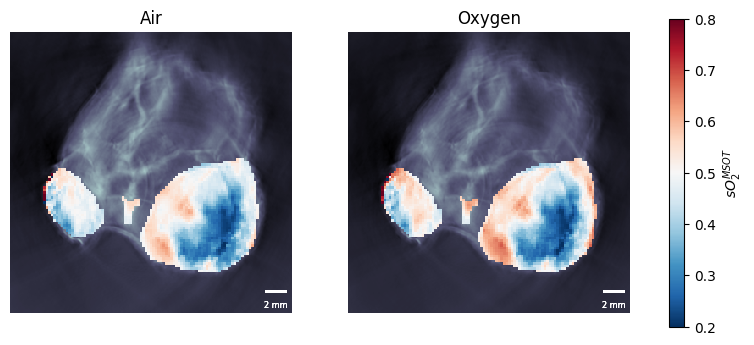

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Show initial slice
rec[0].imshow(ax=ax1)
so2[0].imshow(roi_mask=roi_tumour_right, clim=(0.2,0.8), ax=ax1)
so2[0].imshow(roi_mask=roi_tumour_left, clim=(0.2,0.8), ax=ax1)
im = so2[0].imshow(roi_mask=roi_reference, clim=(0.2,0.8), ax=ax1)
ax1.set_title("Air")

# Show final slice
rec[90].imshow(ax=ax2)
so2[90].imshow(roi_mask=roi_tumour_right, clim=(0.2,0.8), ax=ax2)
so2[90].imshow(roi_mask=roi_tumour_left, clim=(0.2,0.8), ax=ax2)
im = so2[90].imshow(roi_mask=roi_reference, clim=(0.2,0.8), ax=ax2)
ax2.set_title("Oxygen")

plt.colorbar(im, ax=[ax1, ax2], label="$sO_2^{MSOT}$")
plt.show()

In [4]:
# to apply the mask
def get_trace(so2_data, region):
    mask, so2_slice = region.to_mask_slice(so2_data)
    so2_timeseries = so2_data.raw_data.T[mask.T].T[:, 0, :]
    # Unmixed SO2 can be out of the interval [0, 1] when there is low SNR.
    so2_timeseries[(so2_timeseries>1) | (so2_timeseries<0)] = np.nan
    return np.nanmean(so2_timeseries, axis=-1) * 100

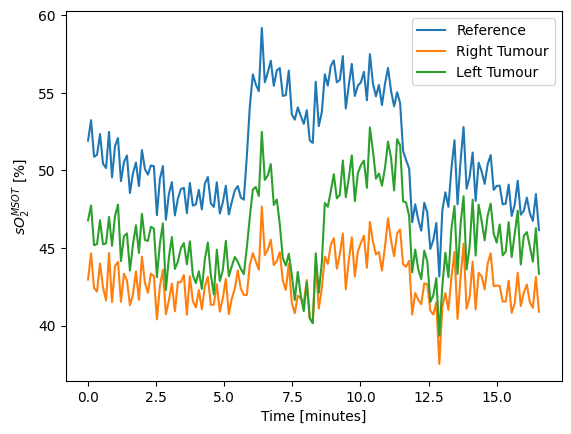

In [5]:
plt.plot(times, get_trace(so2, roi_reference), label="Reference")
plt.plot(times, get_trace(so2, roi_tumour_right), label="Right Tumour")
plt.plot(times, get_trace(so2, roi_tumour_left), label="Left Tumour")
plt.xlabel("Time [minutes]")
plt.ylabel("$sO_2^{MSOT}$ [%]")
plt.legend()
plt.show()

In [6]:
gca = pat.GasChallengeAnalyser(display_output=False)

In [7]:
dso2, _, (baseline_so2, baseline_sigma_so2) = gca.run(so2, pa)

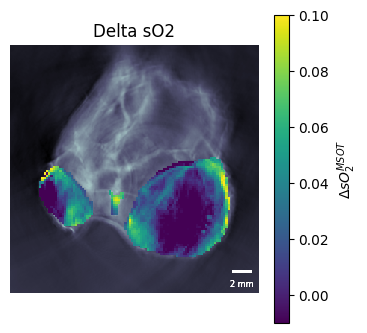

In [8]:
fig, ax1 = plt.subplots(figsize=(4, 4))

# Show initial slice
rec[0].imshow(ax=ax1)
dso2.imshow(roi_mask=roi_tumour_right, ax=ax1, clim=(-0.01, 0.1))
dso2.imshow(roi_mask=roi_tumour_left, ax=ax1, clim=(-0.01, 0.1))
im = dso2.imshow(roi_mask=roi_reference, ax=ax1, clim=(-0.01, 0.1))
ax1.set_title("Delta sO2")

plt.colorbar(im, ax=ax1, label="$\Delta sO_2^{MSOT}$")
plt.show()